In [27]:
import tensorflow as tf
import numpy as  np
import  pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [28]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=42)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
model= Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [37]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=3500, verbose=0)

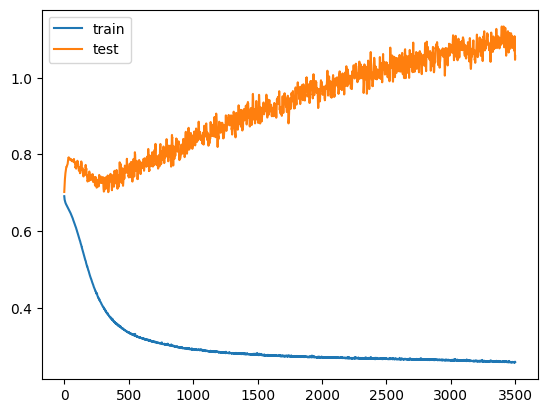

In [38]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

THe above plot shows that the  overfitting has occurred for  the

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


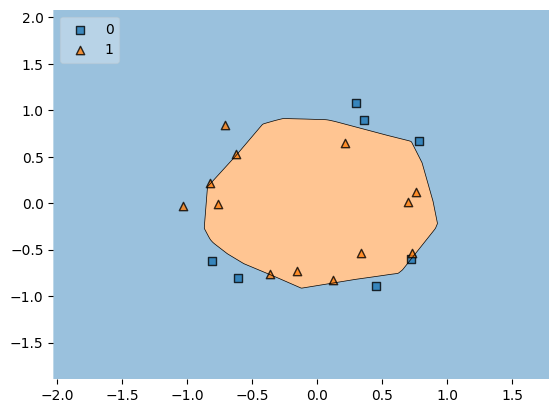

In [41]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

Early Stopping

In [43]:
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [47]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [49]:
history= model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.6242 - loss: 0.6933 - val_accuracy: 0.8000 - val_loss: 0.6553
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7531 - loss: 0.6613 - val_accuracy: 0.8000 - val_loss: 0.6224
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7688 - loss: 0.6354 - val_accuracy: 0.8000 - val_loss: 0.5957
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7609 - loss: 0.6172 - val_accuracy: 0.8000 - val_loss: 0.5753
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8008 - loss: 0.5934 - val_accuracy: 0.8000 - val_loss: 0.5581
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8625 - loss: 0.5568 - val_accuracy: 0.8500 - val_loss: 0.5419
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8523 - loss: 0.5417 - val_accuracy: 0.8500 - val_loss: 0.5273
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8531 - loss: 0.5235 - val_accuracy: 0.8000 - 

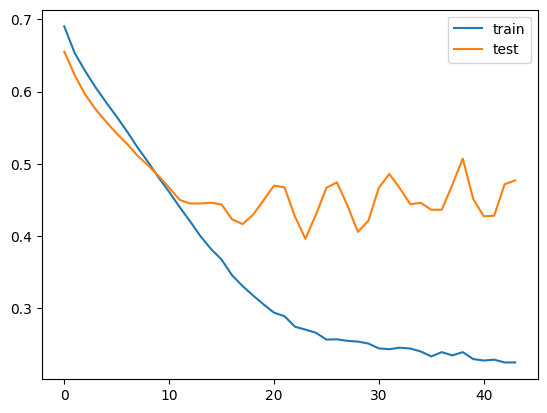

In [51]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


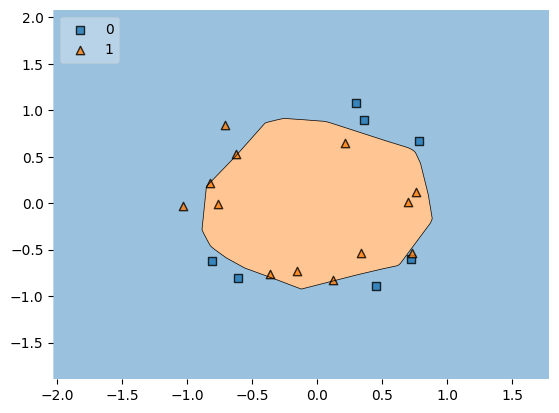

In [52]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()